In [2]:
%load_ext autoreload
%autoreload 2
import os
import pickle as pkl
from typing import Dict, Any
from collections import Counter

import numpy as np
import pandas as pd
import sklearn as sk
from tqdm import tqdm
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, 
    average_precision_score, precision_recall_curve, plot_precision_recall_curve, make_scorer
)
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import fetch_openml
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250
import dvu  # for visualization

import imodels

# change working directory to project root
if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../..')

from experiments.compare_models import get_dataset
from experiments.config import COMPARISON_DATASETS
from experiments.models.stablelinear import StableLinearClassifier
from experiments.models.stableskope import StableSkopeClassifier
from experiments.notebooks import viz
from experiments.util import get_comparison_result, get_best_models_under_complexity, MODEL_COMPARISON_PATH

np.random.seed(0)

- BRL fit .rules_
- Recreate original background gradient analysis from cache 

Done
- try different complexity levels
- make test and val estimators exact same to mke stablerules test comparison accurate
- rethink train/val/test system
- include brs, grl, oner on train data
- rerun comps including average_precision_score

# validation plots

In [111]:
!python experiments/compare_models.py --model random_forest --ignore_cache --cv

100%|█████████████████████████████████████████████| 9/9 [00:42<00:00,  4.77s/it]


In [4]:
# df = get_comparison_result(MODEL_COMPARISON_PATH, 'gradient_boosting')['df']
# df

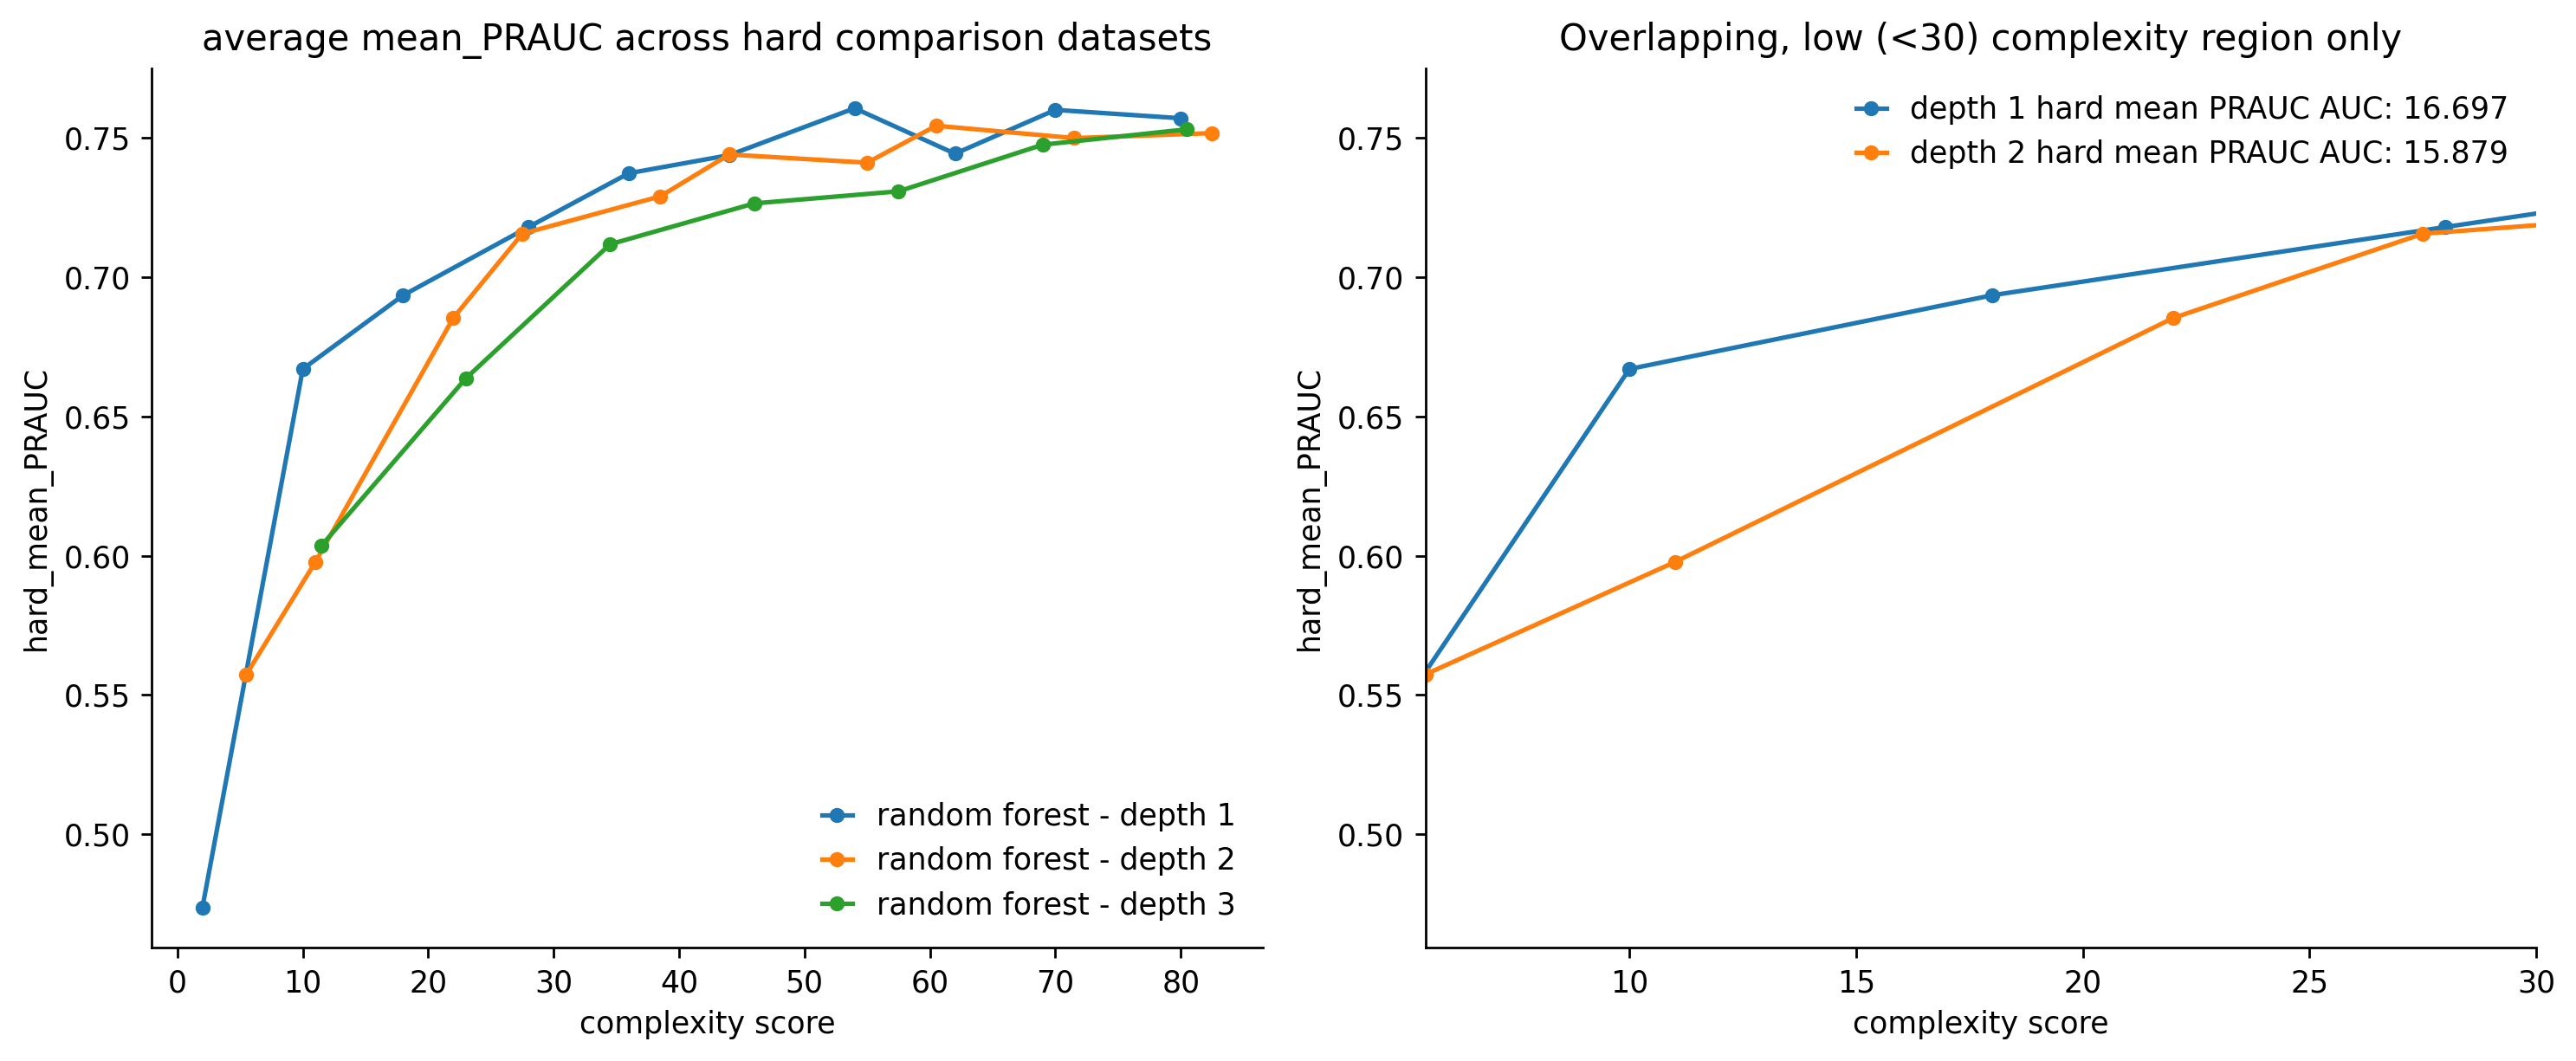

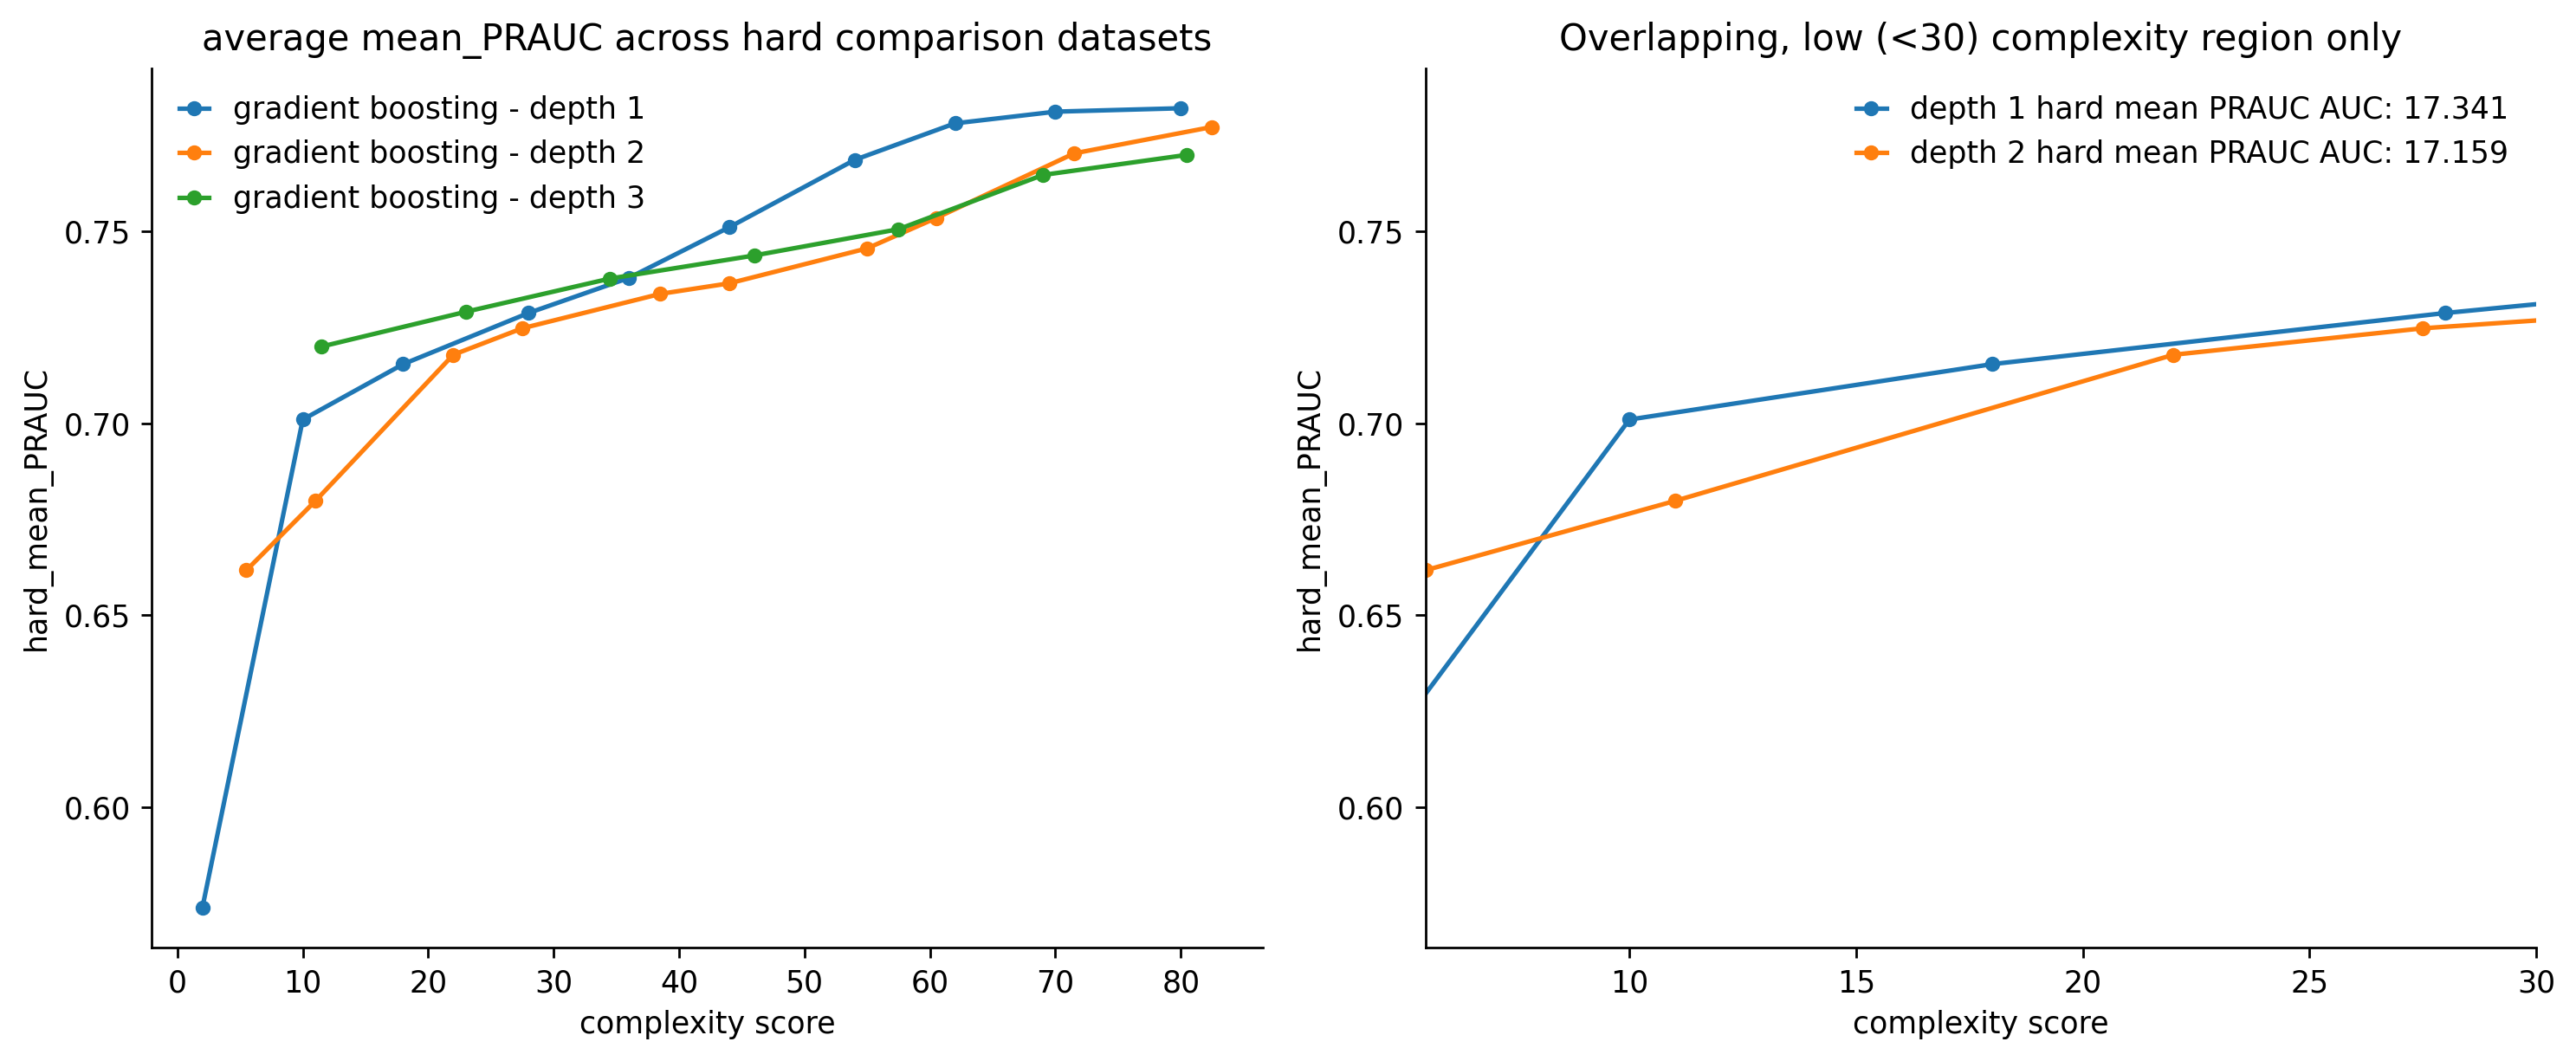

KeyError: 'hard_mean_complexity'

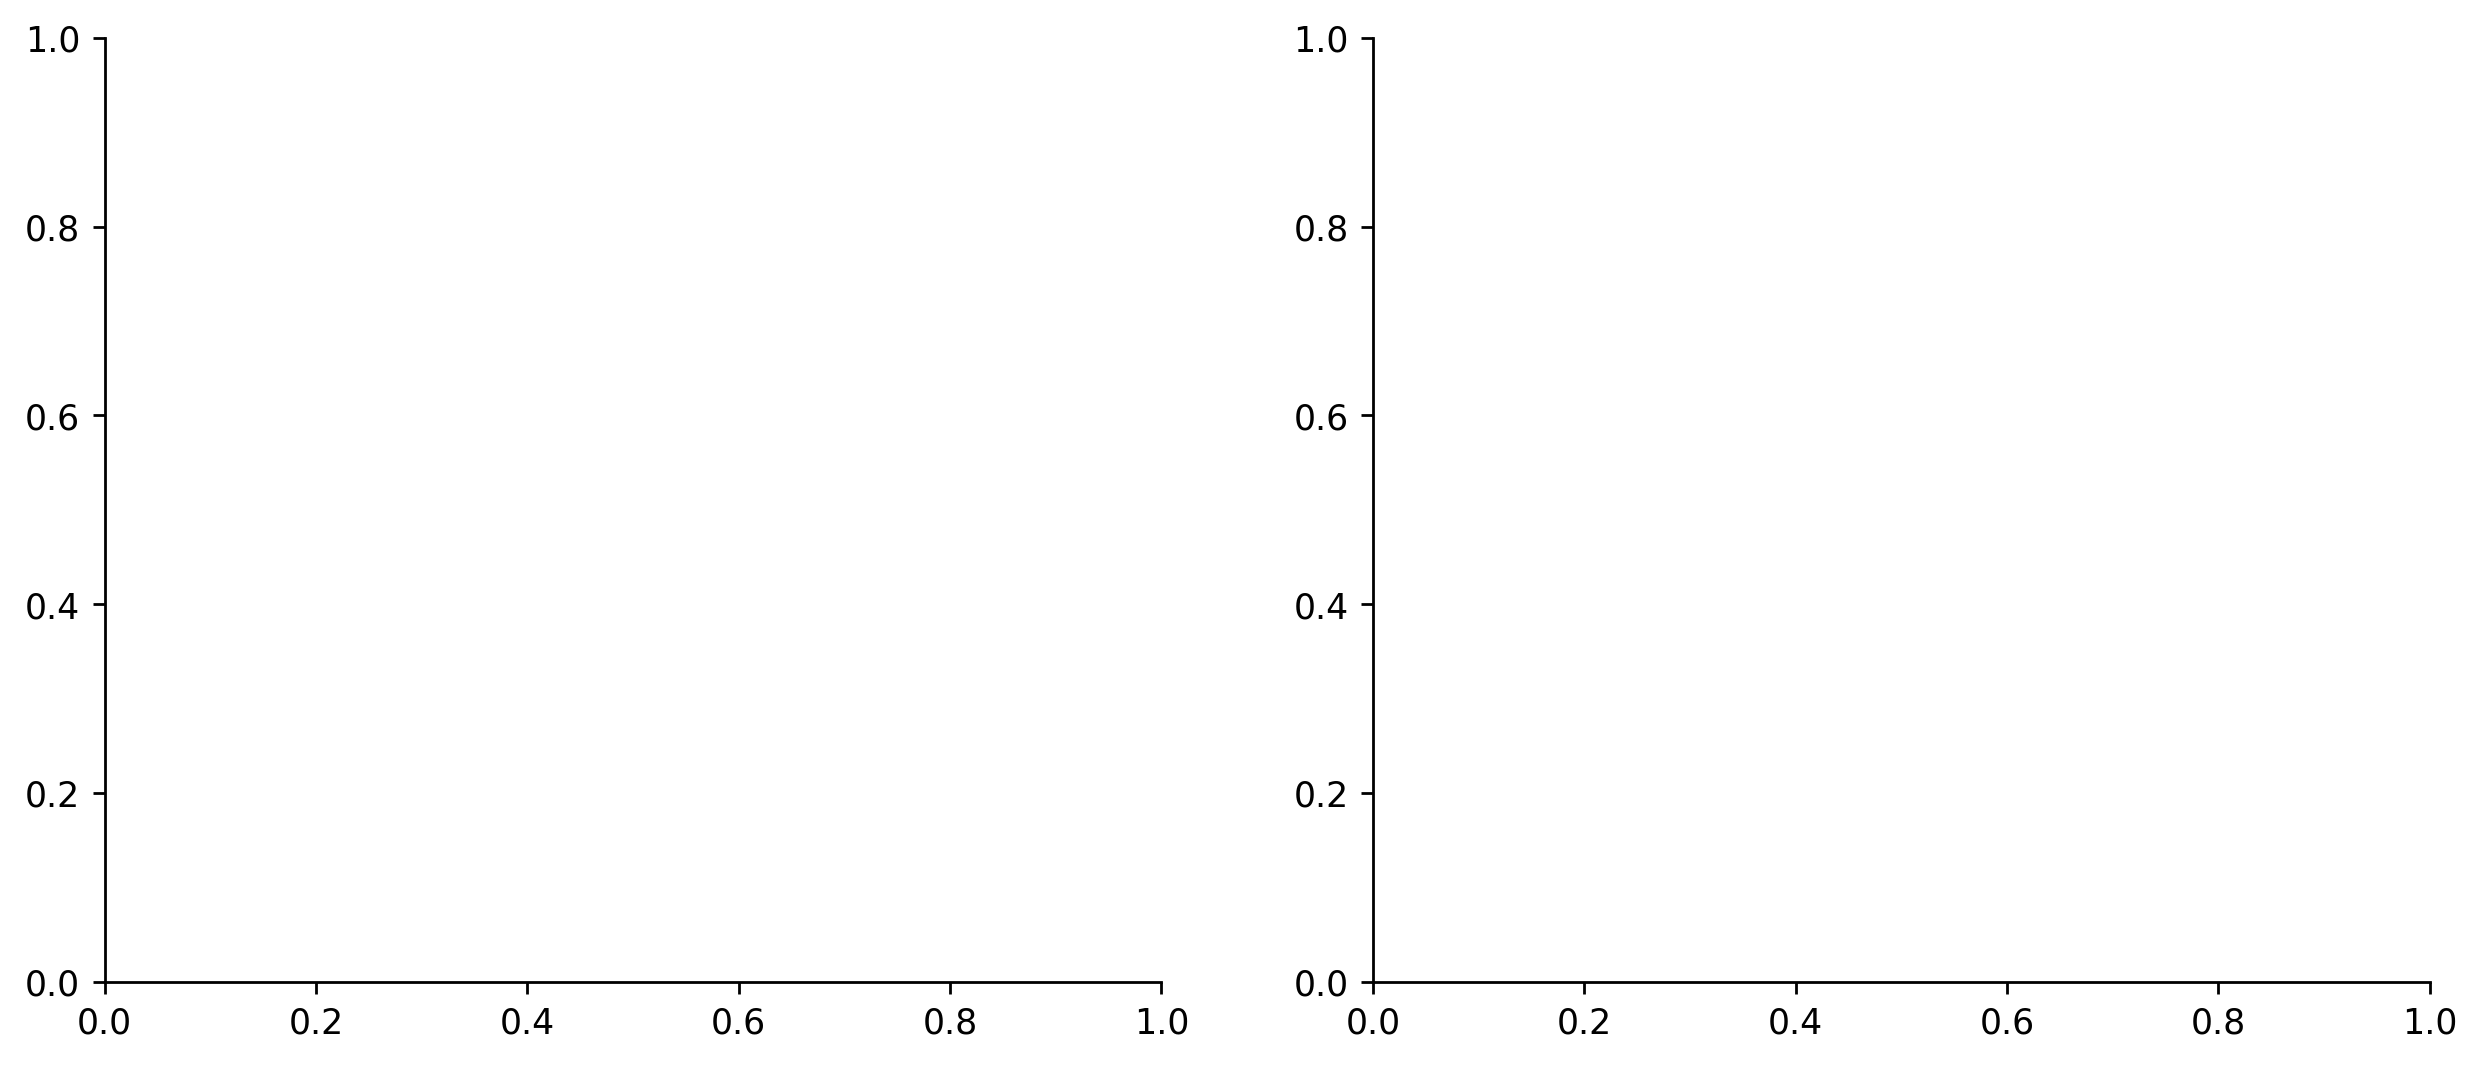

In [5]:
val_models = ['random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'fplasso', 'fpskope', 'brl', 'brs']
for model_name in val_models:    
    comparison_result = get_comparison_result(MODEL_COMPARISON_PATH, model_name)
    viz.viz_comparison_val_average(comparison_result, prefix='hard', metric='mean_PRAUC')
    plt.show()

# validation plots - low data setting

In [95]:
# val_results_ld = [get_comparison_result(MODEL_COMPARISON_PATH + 'low_data/', mname) for mname in val_models]
val_results_ld = get_comparison_result(MODEL_COMPARISON_PATH, 'random_forest')

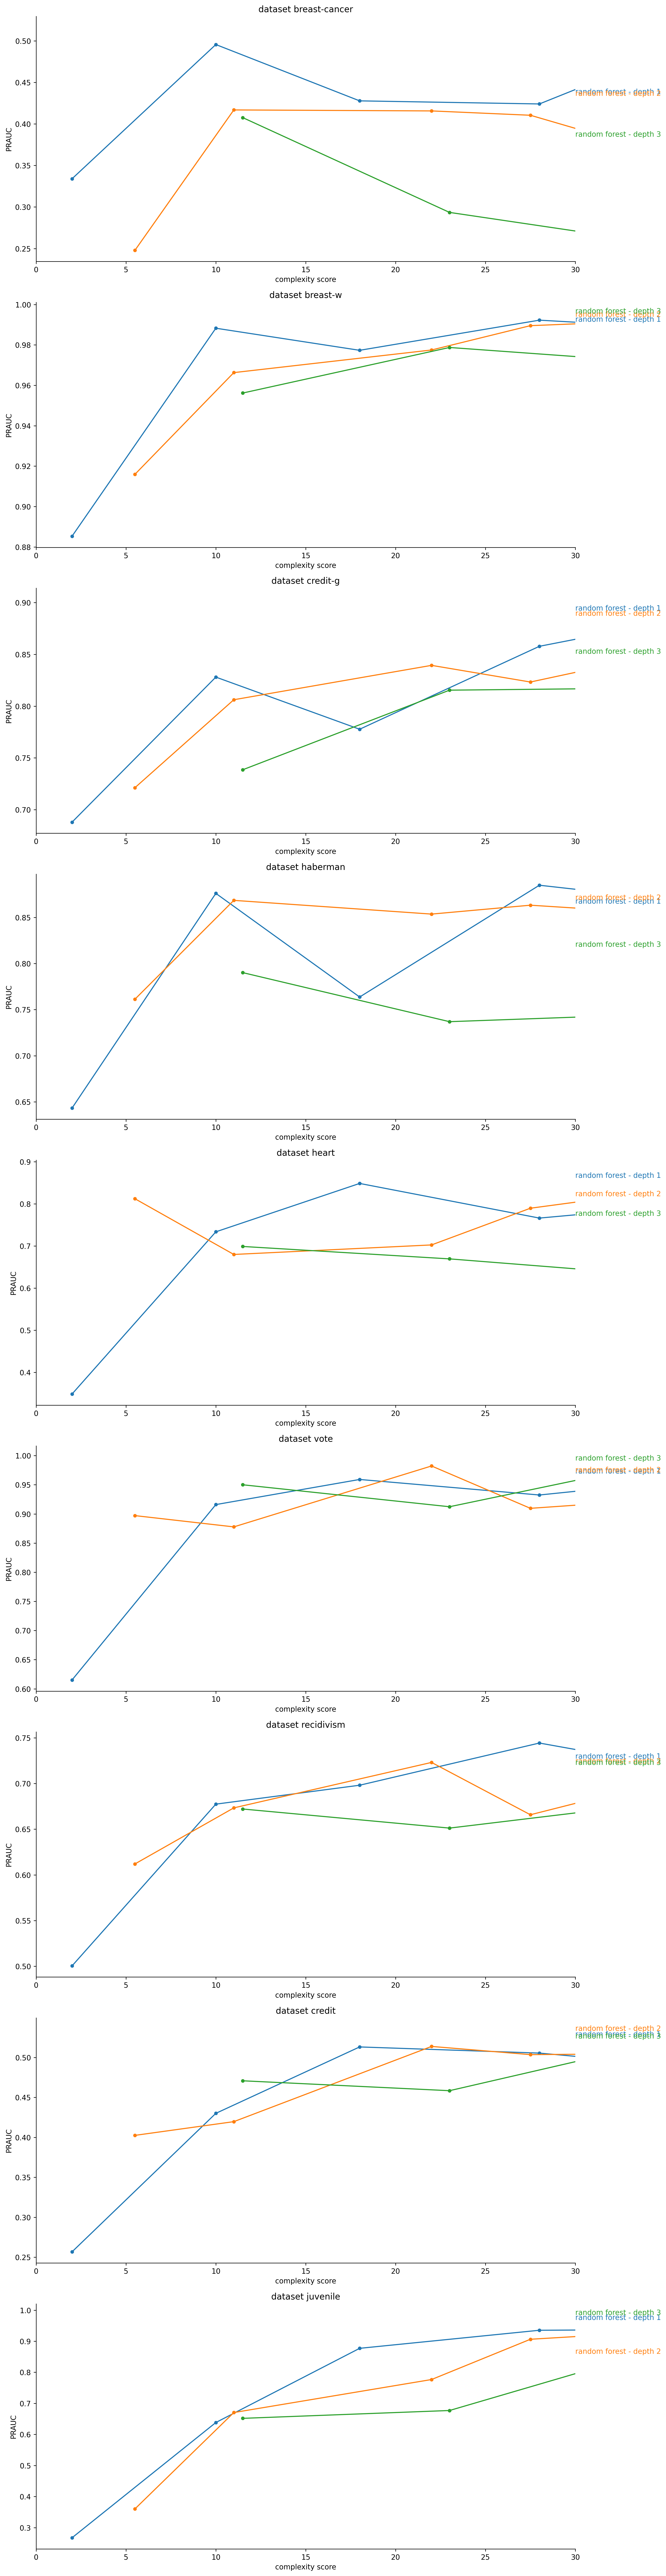

In [96]:
viz.viz_comparison_datasets(val_results_ld, cols=1, figsize=(13, 50), test=False)
plt.show()

In [ ]:
val_models = ['random_forest', 'gradient_boosting', 'skope_rules', 'rulefit', 'fpskope', 'brs']

for model_name in val_models:    
    comparison_result = get_comparison_result(MODEL_COMPARISON_PATH + 'low_data/', model_name)
    viz.viz_comparison_val_average(comparison_result, 'hard_mean_PRAUC')
    plt.show()